# **BT thực hành 4.2: Gradient Descent - USA Housing**

> Cập nhật: **07/2023**




---
## **Yêu cầu 1: Hồi quy tuyến tính**
Cho tập tin dữ liệu USA_Housing.csv
- Đọc tập tin USA_Housing.csv vào dataframe
- Chọn input X = df[['Avg. Area Income']] và output y = df['Price']
- Chuẩn hóa X theo phương pháp MinMaxScaler
- Với y = mx + b, xác định các tham số tính m và b theo phương pháp Gradient Descent
- Biểu diễn trực quan kết quả hồi quy tuyến tính
---


In [1]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/LDS3/Thuc hanh/Ch4_Calculus'

Mounted at /content/gdrive


In [2]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd

from sklearn.preprocessing import MinMaxScaler

In [3]:
##------------------------------------------------------------------------------
## Hàm thực hiện thuật toán Gradient Descent
##------------------------------------------------------------------------------
def gradient_descent(rho, x, y, numIterations):
    # Các tham số:
    #     rho: learning rate
    #     x  : ma trận input  x = [[1 x0],[1 x1], [1  x2], ...]
    #     y  : vector  output y = [y0, y1, y2, ...]
    #     numIterations: số vòng lặp

    # Kích thước tập mẫu (training set)
    N = x.shape[0]

    # Khởi tạo (tùy ý) vector tham số cần xác định: theta = (b, m) = [1, 1]
    theta = np.ones(2)

    # Tìm cực tiểu địa phương của loss fuction (di chuyển dần dần ngược dấu đạo hàm)
    for iter in range(0, numIterations):
        yHat = np.dot(x, theta)
        loss = (yHat - y)

        # Đạo hàm của hàm J (riêng phần theo theta[0] và theta[1])
        J = np.sum(loss ** 2) / (2 * N)
        theta0_prime = np.sum(loss)/N           # đạo hàm theo theta0
        theta1_prime = np.sum(loss * x[:,1])/N  # đạo hàm theo theta1

        gradient = np.array([theta0_prime, theta1_prime])

        # Di chuyển ngược dấu đạo hàm đến điểm mới
        theta = theta - (rho * gradient)
    return theta
##------------------------------------------------------------------------------

In [4]:
## Đọc tập tin USA_Housing.csv
df = pd.read_csv(folder + '/Data/USA_Housing.csv')

In [5]:
## Mô hình hóa dữ liệu: Input X, Output y
X = df[['Avg. Area Income']]
y = df['Price']
print(X[:5])

   Avg. Area Income
0      79545.458574
1      79248.642455
2      61287.067179
3      63345.240046
4      59982.197226


In [6]:
## Chuẩn hóa X theo phương pháp MinMaxScaler
scaled_X = MinMaxScaler().fit_transform(X)[:, 0]
scaled_X[:5]

array([0.68682217, 0.68352073, 0.48373705, 0.50662977, 0.46922319])

In [7]:
## Thêm 1 vào cột đầu tiên của X để có cùng số chiều với vector tham số (m, b)
xHat = np.c_[np.ones(scaled_X.size), scaled_X]
xHat

array([[1.        , 0.68682217],
       [1.        , 0.68352073],
       [1.        , 0.48373705],
       ...,
       [1.        , 0.50713527],
       [1.        , 0.55841872],
       [1.        , 0.53071451]])

In [8]:
## Áp dụng Gradient Descent để xác định theta = (b, m)
rho   = 0.01 # learning rate
theta = gradient_descent(rho, xHat, y, 10000)

In [9]:
## Phương trình đường thẳng (không gian 2D): y = m.x + b
y_predict = theta[1] * xHat + theta[0]

print('Phương trình hồi quy tuyến tính:')
print('   y = (', theta[1], ') * x + (', theta[0], ')')

Phương trình hồi quy tuyến tính:
   y = ( 1432074.4570420238 ) * x + ( 425980.72990502836 )


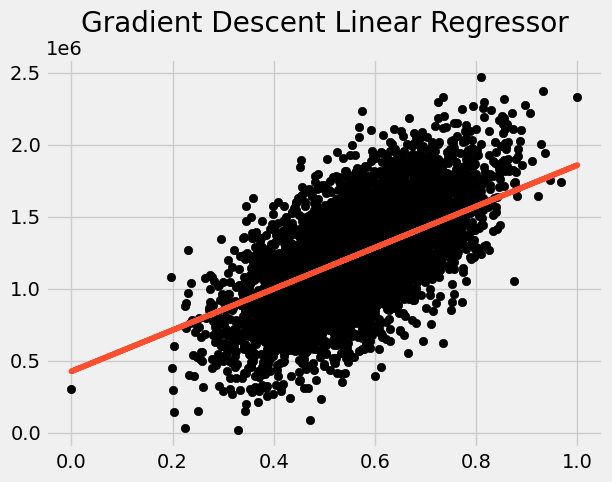

In [10]:
## Biểu diễn trực quan
plt.style.use('fivethirtyeight')
plt.scatter(xHat[:,1], y, color = 'black')
plt.plot(xHat, y_predict)
plt.title("Gradient Descent Linear Regressor")
plt.show()

In [ ]:
# Thử nghiệm với thư viện sklearn
# Thử nghiệm với ma trận giả nghịch đảo
# Thử nghiệm với công thức hiệp phương sai